# Important:
#### 1. Please add the [Previous Notebook's output Dataset](https://www.kaggle.com/timothyalexjohn/birdcall-spectrograms-cornell-birdcall-challenge) to this Notebook.

#### 2. Trained Model (Output) of this Notebook can be found [here](https://www.kaggle.com/timothyalexjohn/xception-birdcall-model). 

# Notebook_1 || Part 2

This Notebook is the **2nd Part** of 'Birdsong_Classifier_Keras_CNN' Notebook for "Cornell Birdcall Identification" challenge.

In the [Previous Part](https://www.kaggle.com/timothyalexjohn/birdsong-classifier-keras-cnn-part-1-notebook-1) of Notebook_1 we converted Audio Files to Spectrogram Image Files using Librosa. 

In this Part we upload last Notebook's Output and train CNN on the extracted features. 

In the [Next part](https://www.kaggle.com/timothyalexjohn/birdsong-classifier-keras-cnn-part-3-notebook-1), trained-model of this notebook and uploaded to next Notebook for prediction.

## Notebooks in this Challenge:

* Notebook_1:
       
 > [Part 1](https://www.kaggle.com/timothyalexjohn/birdsong-classifier-keras-cnn-part-1-notebook-1):  Converting Audio Files to Spectrogram Image Files using Librosa
  
 > [Part 2](https://www.kaggle.com/timothyalexjohn/birdsong-classifier-keras-cnn-part-2-notebook-1):  Running CNN on Extracted Features / Training
 
 > [Part 3](https://www.kaggle.com/timothyalexjohn/birdsong-classifier-keras-cnn-part-3-notebook-1): Prediction of test data
 

* Notebook_2:
        
 >Running LSTM Cells directly on Audio Files
 
 
...Links will be updated soon!

## Importing Library

In [ ]:
import librosa            # Python Audio Manipulation Library
import librosa.display
import numpy as np
import pandas as pd
import os
import cv2

import tensorflow.keras as tk
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Flatten,MaxPooling2D, GlobalAveragePooling2D, Dropout, Input, Concatenate, BatchNormalization, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt

## Reference Directory

In [ ]:
train_dir = '../input/birdcall-spectrograms-cornell-birdcall-challenge/train'
train_csv_dir = '../input/birdsong-recognition/train.csv'

test_dir = '../input/birdsong-recognition/test_audio/'
test_csv_dir = '../input/birdsong-recognition/test.csv'
####################################################################################################/test/exa_test_......
exa_test_dir = '../input/birdcall-spectrograms-cornell-birdcall-challenge/example_test_image/'
exa_test_csv_dir = '../input/birdsong-recognition/example_test_audio_summary.csv'

train_df = pd.read_csv(train_csv_dir)
val_df = pd.read_csv(exa_test_csv_dir)
test_df = pd.read_csv(test_csv_dir)

########## [This is Not used for validation, bcz of ebird_code error] ##########
val_list = []
val_list_y = []
val_list_df = pd.DataFrame([])

for img in os.listdir(exa_test_dir):
    val_list.append(exa_test_dir +img)
    img_name = img.split('.')[0]
    val_list_y.append(' '.join(val_df[val_df['filename_seconds']==img_name]['birds'].astype(str).values))

val_list_df['image'] = val_list
val_list_df['label'] = val_list_y

## Data Generator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150), 
                                                    class_mode = 'categorical',
                                                    batch_size = 160,
                                                    shuffle = True,
                                                    subset= 'training')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150), 
                                                    class_mode = 'categorical',
                                                    batch_size = 160,
                                                    shuffle = True,
                                                    subset= 'validation')

print(train_generator.class_indices)

Found 17134 images belonging to 264 classes.

Found 4209 images belonging to 264 classes.

{'aldfly': 0, 'ameavo': 1, 'amebit': 2, 'amecro': 3, 'amegfi': 4, 'amekes': 5, 'amepip': 6, 'amered': 7, 'amerob': 8, 'amewig': 9, 'amewoo': 10, 'amtspa': 11, 'annhum': 12, 'astfly': 13, 'baisan': 14, 'baleag': 15, 'balori': 16, 'banswa': 17, 'barswa': 18, 'bawwar': 19, 'belkin1': 20, 'belspa2': 21, 'bewwre': 22, 'bkbcuc': 23, 'bkbmag1': 24, 'bkbwar': 25, 'bkcchi': 26, 'bkchum': 27, 'bkhgro': 28, 'bkpwar': 29, 'bktspa': 30, 'blkpho': 31, 'blugrb1': 32, 'blujay': 33, 'bnhcow': 34, 'boboli': 35, 'bongul': 36, 'brdowl': 37, 'brebla': 38, 'brespa': 39, 'brncre': 40, 'brnthr': 41, 'brthum': 42, 'brwhaw': 43, 'btbwar': 44, 'btnwar': 45, 'btywar': 46, 'buffle': 47, 'buggna': 48, 'buhvir': 49, 'bulori': 50, 'bushti': 51, 'buwtea': 52, 'buwwar': 53, 'cacwre': 54, 'calgul': 55, 'calqua': 56, 'camwar': 57, 'cangoo': 58, 'canwar': 59, 'canwre': 60, 'carwre': 61, 'casfin': 62, 'caster1': 63, 'casvir': 64, 'cedwax': 65, 'chispa': 66, 'chiswi': 67, 'chswar': 68, 'chukar': 69, 'clanut': 70, 'cliswa': 71, 'comgol': 72, 'comgra': 73, 'comloo': 74, 'commer': 75, 'comnig': 76, 'comrav': 77, 'comred': 78, 'comter': 79, 'comyel': 80, 'coohaw': 81, 'coshum': 82, 'cowscj1': 83, 'daejun': 84, 'doccor': 85, 'dowwoo': 86, 'dusfly': 87, 'eargre': 88, 'easblu': 89, 'easkin': 90, 'easmea': 91, 'easpho': 92, 'eastow': 93, 'eawpew': 94, 'eucdov': 95, 'eursta': 96, 'evegro': 97, 'fiespa': 98, 'fiscro': 99, 'foxspa': 100, 'gadwal': 101, 'gcrfin': 102, 'gnttow': 103, 'gnwtea': 104, 'gockin': 105, 'gocspa': 106, 'goleag': 107, 'grbher3': 108, 'grcfly': 109, 'greegr': 110, 'greroa': 111, 'greyel': 112, 'grhowl': 113, 'grnher': 114, 'grtgra': 115, 'grycat': 116, 'gryfly': 117, 'haiwoo': 118, 'hamfly': 119, 'hergul': 120, 'herthr': 121, 'hoomer': 122, 'hoowar': 123, 'horgre': 124, 'horlar': 125, 'houfin': 126, 'houspa': 127, 'houwre': 128, 'indbun': 129, 'juntit1': 130, 'killde': 131, 'labwoo': 132, 'larspa': 133, 'lazbun': 134, 'leabit': 135, 'leafly': 136, 'leasan': 137, 'lecthr': 138, 'lesgol': 139, 'lesnig': 140, 'lesyel': 141, 'lewwoo': 142, 'linspa': 143, 'lobcur': 144, 'lobdow': 145, 'logshr': 146, 'lotduc': 147, 'louwat': 148, 'macwar': 149, 'magwar': 150, 'mallar3': 151, 'marwre': 152, 'merlin': 153, 'moublu': 154, 'mouchi': 155, 'moudov': 156, 'norcar': 157, 'norfli': 158, 'norhar2': 159, 'normoc': 160, 'norpar': 161, 'norpin': 162, 'norsho': 163, 'norwat': 164, 'nrwswa': 165, 'nutwoo': 166, 'olsfly': 167, 'orcwar': 168, 'osprey': 169, 'ovenbi1': 170, 'palwar': 171, 'pasfly': 172, 'pecsan': 173, 'perfal': 174, 'phaino': 175, 'pibgre': 176, 'pilwoo': 177, 'pingro': 178, 'pinjay': 179, 'pinsis': 180, 'pinwar': 181, 'plsvir': 182, 'prawar': 183, 'purfin': 184, 'pygnut': 185, 'rebmer': 186, 'rebnut': 187, 'rebsap': 188, 'rebwoo': 189, 'redcro': 190, 'redhea': 191, 'reevir1': 192, 'renpha': 193, 'reshaw': 194, 'rethaw': 195, 'rewbla': 196, 'ribgul': 197, 'rinduc': 198, 'robgro': 199, 'rocpig': 200, 'rocwre': 201, 'rthhum': 202, 'ruckin': 203, 'rudduc': 204, 'rufgro': 205, 'rufhum': 206, 'rusbla': 207, 'sagspa1': 208, 'sagthr': 209, 'savspa': 210, 'saypho': 211, 'scatan': 212, 'scoori': 213, 'semplo': 214, 'semsan': 215, 'sheowl': 216, 'shshaw': 217, 'snobun': 218, 'snogoo': 219, 'solsan': 220, 'sonspa': 221, 'sora': 222, 'sposan': 223, 'spotow': 224, 'stejay': 225, 'swahaw': 226, 'swaspa': 227, 'swathr': 228, 'treswa': 229, 'truswa': 230, 'tuftit': 231, 'tunswa': 232, 'veery': 233, 'vesspa': 234, 'vigswa': 235, 'warvir': 236, 'wesblu': 237, 'wesgre': 238, 'weskin': 239, 'wesmea': 240, 'wessan': 241, 'westan': 242, 'wewpew': 243, 'whbnut': 244, 'whcspa': 245, 'whfibi': 246, 'whtspa': 247, 'whtswi': 248, 'wilfly': 249, 'wilsni1': 250, 'wiltur': 251, 'winwre3': 252, 'wlswar': 253, 'wooduc': 254, 'wooscj2': 255, 'woothr': 256, 'y00475': 257, 'yebfly': 258, 'yebsap': 259, 'yehbla': 260, 'yelwar': 261, 'yerwar': 262, 'yetvir': 263}

## Model

In [ ]:
model = Xception(weights='imagenet', include_top=False, input_shape = (150, 150, 3), pooling = 'max')
final_output = Dense(264, activation = 'softmax')(model.output)
model = Model(inputs = model.input, outputs = final_output)

## Callback Functions

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback


# autosave best Model
best_model = ModelCheckpoint("model", monitor='val_accuracy', mode='max',verbose=1, save_best_only=True)

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 10,
                          mode = 'auto',
                          verbose = 1,
                          restore_best_weights = True)

acc_thresh = 0.998

class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > acc_thresh):   
          print("\nWe have reached %2.2f%% accuracy, so we will stopping training." %(acc_thresh*100))   
          self.model.stop_training = True

callbacks = [myCallback(), best_model, earlystop]

## Compiling and Training...

In [ ]:
model.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(train_generator,
                              epochs = 100,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator),
                              callbacks = callbacks,
                              verbose= 1)

## Training in Google Colab

Epoch 1/100
  2/108 [..............................] - ETA: 2:12 - loss: 6.5205 - accuracy: 0.0031WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.6736s vs `on_train_batch_end` time: 1.8212s). Check your callbacks.
108/108 [==============================] - ETA: 0s - loss: 5.3641 - accuracy: 0.0189
Epoch 00001: val_accuracy improved from -inf to 0.02851, saving model to model
WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Layer.updates (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 315s 3s/step - loss: 5.3641 - accuracy: 0.0189 - val_loss: 6.2479 - val_accuracy: 0.0285
Epoch 2/100
108/108 [==============================] - ETA: 0s - loss: 3.8983 - accuracy: 0.1499
Epoch 00002: val_accuracy improved from 0.02851 to 0.14992, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 315s 3s/step - loss: 3.8983 - accuracy: 0.1499 - val_loss: 4.2193 - val_accuracy: 0.1499
Epoch 3/100
108/108 [==============================] - ETA: 0s - loss: 2.8843 - accuracy: 0.3127
Epoch 00003: val_accuracy improved from 0.14992 to 0.22357, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 314s 3s/step - loss: 2.8843 - accuracy: 0.3127 - val_loss: 3.7993 - val_accuracy: 0.2236
Epoch 4/100
108/108 [==============================] - ETA: 0s - loss: 2.1958 - accuracy: 0.4508
Epoch 00004: val_accuracy improved from 0.22357 to 0.28890, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 314s 3s/step - loss: 2.1958 - accuracy: 0.4508 - val_loss: 3.4109 - val_accuracy: 0.2889
Epoch 5/100
108/108 [==============================] - ETA: 0s - loss: 1.5313 - accuracy: 0.5903
Epoch 00005: val_accuracy did not improve from 0.28890
108/108 [==============================] - 295s 3s/step - loss: 1.5313 - accuracy: 0.5903 - val_loss: 3.5206 - val_accuracy: 0.2754
Epoch 6/100
108/108 [==============================] - ETA: 0s - loss: 1.0594 - accuracy: 0.7054
Epoch 00006: val_accuracy did not improve from 0.28890
108/108 [==============================] - 294s 3s/step - loss: 1.0594 - accuracy: 0.7054 - val_loss: 4.3753 - val_accuracy: 0.2518
Epoch 7/100
108/108 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.7886
Epoch 00007: val_accuracy improved from 0.28890 to 0.31884, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 313s 3s/step - loss: 0.7211 - accuracy: 0.7886 - val_loss: 3.7360 - val_accuracy: 0.3188
Epoch 8/100
108/108 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.8638
Epoch 00008: val_accuracy did not improve from 0.31884
108/108 [==============================] - 293s 3s/step - loss: 0.4494 - accuracy: 0.8638 - val_loss: 4.2238 - val_accuracy: 0.3032
Epoch 9/100
108/108 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.8782
Epoch 00009: val_accuracy did not improve from 0.31884
108/108 [==============================] - 294s 3s/step - loss: 0.4121 - accuracy: 0.8782 - val_loss: 4.6084 - val_accuracy: 0.2960
Epoch 10/100
108/108 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.9269
Epoch 00010: val_accuracy improved from 0.31884 to 0.33072, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 319s 3s/step - loss: 0.2398 - accuracy: 0.9269 - val_loss: 4.6120 - val_accuracy: 0.3307
Epoch 11/100
108/108 [==============================] - ETA: 0s - loss: 0.2180 - accuracy: 0.9353
Epoch 00011: val_accuracy did not improve from 0.33072
108/108 [==============================] - 297s 3s/step - loss: 0.2180 - accuracy: 0.9353 - val_loss: 5.5805 - val_accuracy: 0.2583
Epoch 12/100
108/108 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.9043
Epoch 00012: val_accuracy improved from 0.33072 to 0.33262, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 319s 3s/step - loss: 0.3296 - accuracy: 0.9043 - val_loss: 4.5209 - val_accuracy: 0.3326
Epoch 13/100
108/108 [==============================] - ETA: 0s - loss: 0.1361 - accuracy: 0.9601
Epoch 00013: val_accuracy did not improve from 0.33262
108/108 [==============================] - 297s 3s/step - loss: 0.1361 - accuracy: 0.9601 - val_loss: 5.1286 - val_accuracy: 0.3165
Epoch 14/100
108/108 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.9551
Epoch 00014: val_accuracy did not improve from 0.33262
108/108 [==============================] - 293s 3s/step - loss: 0.1570 - accuracy: 0.9551 - val_loss: 4.5522 - val_accuracy: 0.3272
Epoch 15/100
108/108 [==============================] - ETA: 0s - loss: 0.1478 - accuracy: 0.9566
Epoch 00015: val_accuracy did not improve from 0.33262
108/108 [==============================] - 294s 3s/step - loss: 0.1478 - accuracy: 0.9566 - val_loss: 6.0066 - val_accuracy: 0.2815
Epoch 16/100
108/108 [==============================] - ETA: 0s - loss: 0.1446 - accuracy: 0.9561
Epoch 00016: val_accuracy did not improve from 0.33262
108/108 [==============================] - 296s 3s/step - loss: 0.1446 - accuracy: 0.9561 - val_loss: 5.0713 - val_accuracy: 0.3184
Epoch 17/100
108/108 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9709
Epoch 00017: val_accuracy improved from 0.33262 to 0.34996, saving model to model
INFO:tensorflow:Assets written to: model/assets
108/108 [==============================] - 319s 3s/step - loss: 0.0999 - accuracy: 0.9709 - val_loss: 4.8199 - val_accuracy: 0.3500
Epoch 18/100
108/108 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.9654
Epoch 00018: val_accuracy did not improve from 0.34996
108/108 [==============================] - 293s 3s/step - loss: 0.1214 - accuracy: 0.9654 - val_loss: 5.2382 - val_accuracy: 0.3338
Epoch 19/100
108/108 [==============================] - ETA: 0s - loss: 0.1304 - accuracy: 0.9618
Epoch 00019: val_accuracy did not improve from 0.34996
108/108 [==============================] - 293s 3s/step - loss: 0.1304 - accuracy: 0.9618 - val_loss: 5.9411 - val_accuracy: 0.2965
Epoch 20/100
108/108 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9515
Epoch 00020: val_accuracy did not improve from 0.34996
108/108 [==============================] - 294s 3s/step - loss: 0.1602 - accuracy: 0.9515 - val_loss: 5.4767 - val_accuracy: 0.3150
Epoch 21/100
108/108 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9484
Epoch 00021: val_accuracy did not improve from 0.34996
108/108 [==============================] - 294s 3s/step - loss: 0.1765 - accuracy: 0.9484 - val_loss: 4.9656 - val_accuracy: 0.3288
Epoch 22/100
108/108 [==============================] - ETA: 0s - loss: 0.1274 - accuracy: 0.9634
Epoch 00022: val_accuracy did not improve from 0.34996
108/108 [==============================] - 295s 3s/step - loss: 0.1274 - accuracy: 0.9634 - val_loss: 5.3694 - val_accuracy: 0.3355
Epoch 23/100
108/108 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9810
Epoch 00023: val_accuracy did not improve from 0.34996
108/108 [==============================] - 296s 3s/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 5.2083 - val_accuracy: 0.2956
Epoch 24/100
108/108 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 0.9726
Epoch 00024: val_accuracy did not improve from 0.34996
108/108 [==============================] - 294s 3s/step - loss: 0.0993 - accuracy: 0.9726 - val_loss: 5.9058 - val_accuracy: 0.3053
Epoch 25/100
108/108 [==============================] - ETA: 0s - loss: 0.1688 - accuracy: 0.9513
Epoch 00025: val_accuracy did not improve from 0.34996
108/108 [==============================] - 295s 3s/step - loss: 0.1688 - accuracy: 0.9513 - val_loss: 6.2194 - val_accuracy: 0.2853
Epoch 26/100
108/108 [==============================] - ETA: 0s - loss: 0.1251 - accuracy: 0.9619
Epoch 00026: val_accuracy did not improve from 0.34996
108/108 [==============================] - 295s 3s/step - loss: 0.1251 - accuracy: 0.9619 - val_loss: 5.0750 - val_accuracy: 0.3400
Epoch 27/100
108/108 [==============================] - ETA: 0s - loss: 0.1368 - accuracy: 0.9598
Epoch 00027: val_accuracy did not improve from 0.34996
Restoring model weights from the end of the best epoch.
108/108 [==============================] - 292s 3s/step - loss: 0.1368 - accuracy: 0.9598 - val_loss: 5.3347 - val_accuracy: 0.3343
Epoch 00027: early stopping

## Plotting Accuracy

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

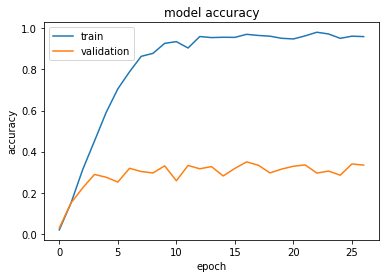

### ZIP Trained Model

In [ ]:
import shutil

shutil.make_archive('trained_resnet50', 'zip', '/kaggle/working/resnet50')

## Reference
* [How to run Kaggle Dataset in Google Colab](https://www.kaggle.com/general/74235)



# Note

Part_1 and Part_2 can be combined by directly training with train_on_batch method (without downloading and re-uploading it)

See You in the [Final Notebook](https://www.kaggle.com/timothyalexjohn/birdsong-classifier-keras-cnn-part-3-notebook-0) of Notebook_1 series!!

### Please Upvote if you liked this Notebook!! 